In [205]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import legendre


In [123]:
# function definition for polynomial
def f(t, y):
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=1/(1-t*t)*(2*t*y[0]-30*y[0])
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

In [190]:
dy1 = 2.5
y=[0.0,dy1]
h = 1.0e-4
t=0
dt=[]
tmax = 1-h
xp1=[]
yp1=[]
while(t<tmax):
    if((t+h)>tmax):
        h= tmax-t
    y = rk4(t,h,y,2)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[1])
    dt=np.append(dt,t)
    t = t+h
    

In [188]:
dy2 = 1.5
y=[0.0,dy2]
xp2=[]
yp2=[]
h = 1.0e-4
t=0
dt=[]
tmax = 1-h
while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    y = rk4(t,h,y,2)
    xp2=np.append(xp2,y[0])
    yp2=np.append(yp2,y[1])
    dt=np.append(dt,t)
    t = t+h


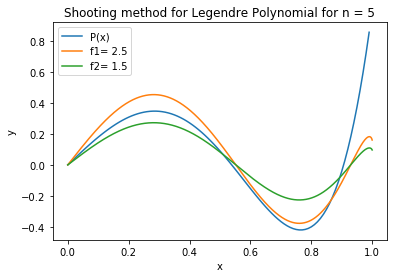

In [191]:
plotleg(5)
plt.plot(dt,xp1,label='f1= '+str(dy1)+'') 
plt.plot(dt,xp2,label='f2= '+str(dy2)+'')
#plt.plot(dt,yp1)
#plt.plot(dt,yp2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Shooting method for Legendre Polynomial for n = 5")
plt.legend()
plt.show()

In [99]:
def plotleg(n):
    Pn = legendre(n)
    leginput = np.arange(0,1,0.01)
    legoutput = Pn(leginput)
    plt.plot(leginput,legoutput,label="P(x)")

Iteration =  1 Guess =  0.9998999999999062  End Point =  0.1282533312877725
Iteration =  2 Guess =  0.9998999999999062  End Point =  0.14428499769874453
Iteration =  3 Guess =  0.9998999999999062  End Point =  0.1523008309042316
Iteration =  4 Guess =  0.9998999999999062  End Point =  0.15630874750697474
Iteration =  5 Guess =  0.9998999999999062  End Point =  0.15831270580834533
Iteration =  6 Guess =  0.9998999999999062  End Point =  0.15931468495903087
Iteration =  7 Guess =  0.9998999999999062  End Point =  0.15981567453437287
Iteration =  8 Guess =  0.9998999999999062  End Point =  0.16006616932204476
Iteration =  9 Guess =  0.9998999999999062  End Point =  0.16019141671588003
Iteration =  10 Guess =  0.9998999999999062  End Point =  0.16025404041279903
Iteration =  11 Guess =  0.9998999999999062  End Point =  0.16028535226125754
Iteration =  12 Guess =  0.9998999999999062  End Point =  0.16030100818548795
Iteration =  13 Guess =  0.9998999999999062  End Point =  0.160308836147602

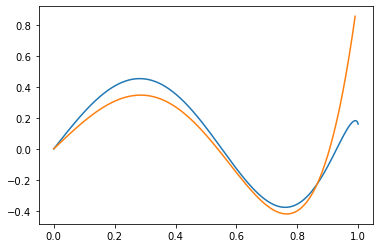

In [268]:
h = 1.0e-4
y = [0,0]
dymin = 1.5
dymax = 2.5
dt = []
t = 0
tmax = 1-h
loop_lim = 50

xp= []


for i in range(loop_lim):
    t= 0 
    dy = dymin/2 + dymax/2
    y=[0,dy]
    xp=[]
    yp=[]
    dt=[]
    h = 1e-4
    tmax = 1-h
    while(t<tmax):
        if((t+h)>tmax):
            h=tmax-t
        y = rk4(t,h,y,2)
        xp=np.append(xp,y[0])
        yp=np.append(yp,y[1])
        dt=np.append(dt,t)
        t = t+h
        
    if(np.abs(xp[-1]-1)<0.01):
        break
    if (xp[-1]<1):
        dymin = dy
    # new max
    if (xp[-1]>1):
        dymax = dy
    
    print ("Iteration = ",i+1,"Guess = ", dt[-1]," End Point = ", xp[-1])
print ("dy max = ", dy)


plt.plot(xp,dt)
plotleg(5)